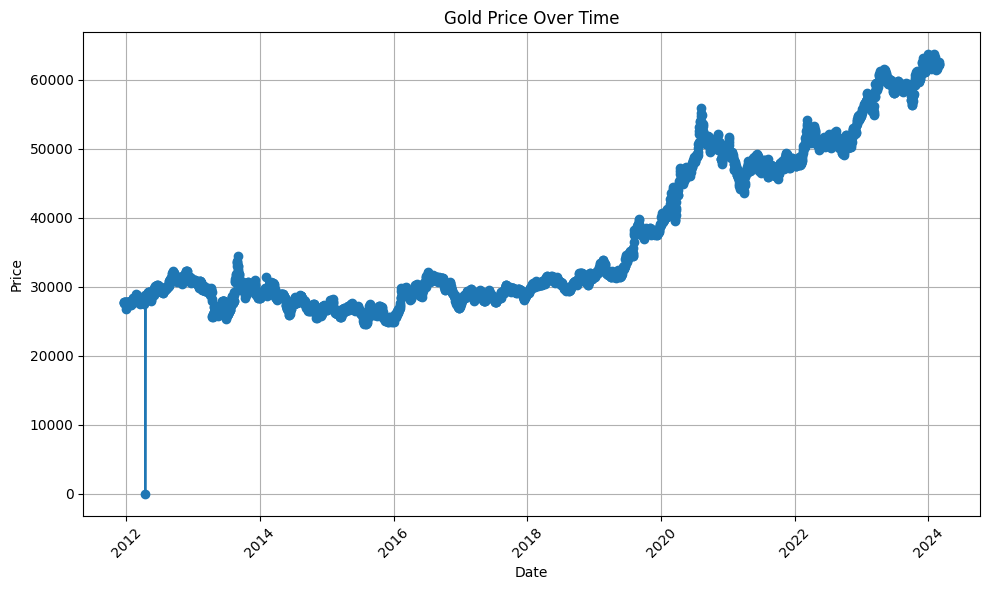

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("golddata.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert the 'Price' column to numeric after removing commas
data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], marker='o', linestyle='-')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
data = pd.read_csv("COPPER-1-MCX.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['date'])

# Convert the 'Price' column to numeric after removing commas
data['Price'] = pd.to_numeric(data['high'].str.replace(',', ''))

# Create a Plotly figure
fig = go.Figure()

# Add a trace for the gold price over time
fig.add_trace(go.Scatter(x=data['Date'], y=data['Price'], mode='lines+markers'))

# Update layout
fig.update_layout(
    title='Gold Price Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    xaxis_tickangle=-45,
    showlegend=False,
    template='plotly_white'
)

# Show the plot
fig.show()


AttributeError: Can only use .str accessor with string values!

In [18]:
import pandas as pd

# List of file paths for all datasets
file_paths = [
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/golddata.csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX Cotton 29mm Futures (MCOTc1).csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX iCOMDEX COPPER (MCICOPR).csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX ICOMDEX Crude Oil (MCICRD).csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX iCOMDEX Energy (MCIENRG).csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX iCOMDEX SILVER (MCISIL).csv"
]

# Read the data from each CSV file and merge it into a single DataFrame
all_data_df = pd.DataFrame(columns=['Date'])  # Initialize DataFrame with 'Date' column

# Merge data for each CSV file
for file_path in file_paths:
    # Read CSV file
    data = pd.read_csv(file_path)
    # Extract 'Date' and 'Price' columns
    data = data[['Date', 'Price']]
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    # Get commodity name from file path
    commodity_name = file_path.split('/')[-1].split('.')[0].split()[-1]
    # Rename 'Price' column to commodity name
    data = data.rename(columns={'Price': commodity_name})
    # Merge data
    all_data_df = pd.merge(all_data_df, data, on='Date', how='outer')

# Sort DataFrame by 'Date' column
all_data_df = all_data_df.sort_values(by='Date').reset_index(drop=True)

# Save merged data to a new CSV file
all_data_df.to_csv("all_dates_data.csv", index=False)


Index(['<ticker>', '<name>', '<date>', '<open>', '<high>', '<low>', '<close>',
       '<volume>', ' <o/i>'],
      dtype='object')


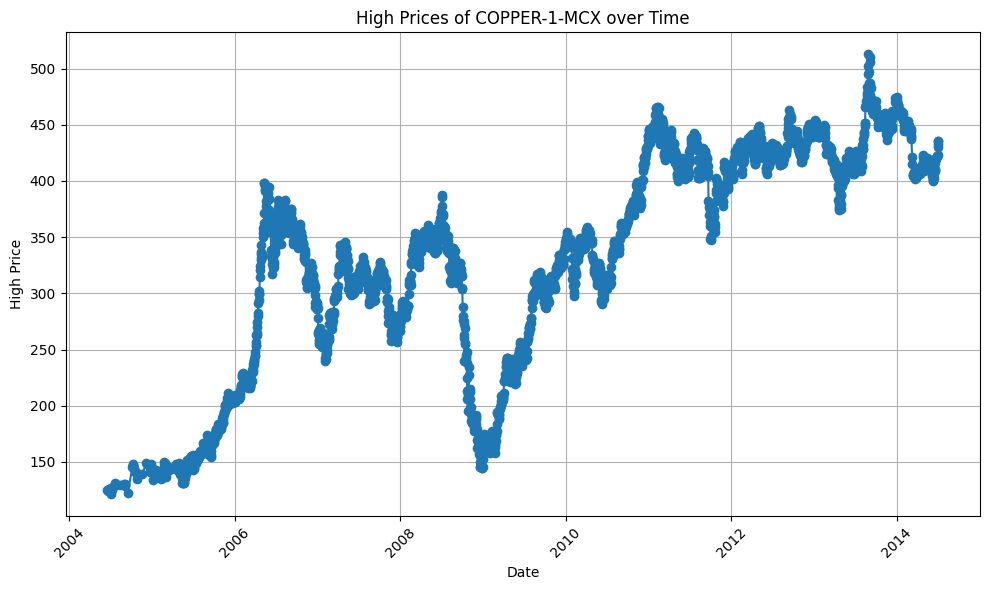

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("COPPER-1-MCX.csv")

# Display the column names to identify the correct columns
print(df.columns)

# Assuming the column names are '<date>', '<high>', replace '<date>' and '<high>' with the actual column names
date_column_name = '<date>'
high_column_name = '<high>'

# Convert the date column to datetime format
df[date_column_name] = pd.to_datetime(df[date_column_name], format='%m/%d/%Y')

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(df[date_column_name], df[high_column_name], marker='o', linestyle='-')
plt.title('High Prices of COPPER-1-MCX over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("Merged.csv")

# Convert the 'date' column to the correct date format (dd/mm/yyyy)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Sort the DataFrame by the 'date' column
df_sorted = df.sort_values(by='date')

# Write the sorted DataFrame back to a CSV file
df_sorted.to_csv("Sorted_Merged.csv", index=False)

print("CSV file has been sorted and saved as 'Sorted_Merged.csv'.")


CSV file has been sorted and saved as 'Sorted_Merged.csv'.


/var/folders/9l/wzktnb7d54j9v29n0t_pr3nw0000gn/T/ipykernel_42191/110413571.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [9]:
import pandas as pd

# Read the sorted CSV file into a DataFrame
df = pd.read_csv("Sorted_Merged.csv")

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the DataFrame to keep data between 1/12/2006 and 1/12/2011
start_date = pd.to_datetime('2006-12-01')
end_date = pd.to_datetime('2011-12-01')
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Write the filtered DataFrame to a new CSV file
filtered_df.to_csv("Filtered_Sorted_Merged.csv", index=False)

print("Data between 1/12/2006 and 1/12/2011 has been filtered and saved as 'Filtered_Sorted_Merged.csv'.")


Data between 1/12/2006 and 1/12/2011 has been filtered and saved as 'Filtered_Sorted_Merged.csv'.


In [10]:
import pandas as pd

# Read the filtered CSV file into a DataFrame
df = pd.read_csv("Filtered_Sorted_Merged.csv")

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Interpolate missing values for 'CRUDEOIL-1-MCX', 'NATURALGAS-1-MCX', and 'GUARSEED-1-MCX'
# Using linear interpolation based on surrounding data
df['CRUDEOIL-1-MCX'] = df['CRUDEOIL-1-MCX'].interpolate(method='linear')
df['NATURALGAS-1-MCX'] = df['NATURALGAS-1-MCX'].interpolate(method='linear')
df['GUARSEED-1-MCX'] = df['GUARSEED-1-MCX'].interpolate(method='linear')

# Write the DataFrame with filled missing values to a new CSV file
df.to_csv("Filled_Filtered_Sorted_Merged.csv", index=False)

print("Missing data has been filled based on surrounding data using interpolation and saved as 'Filled_Filtered_Sorted_Merged.csv'.")


Missing data has been filled based on surrounding data using interpolation and saved as 'Filled_Filtered_Sorted_Merged.csv'.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('5y_data.csv')

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%y')

# Set 'date' as index
data.set_index('date', inplace=True)

# Calculate correlation
correlation = data.corr()

# Print correlation with GOLD-1-MCX
print(correlation['GOLD-1-MCX'])

# Plot correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ModuleNotFoundError: No module named 'seaborn'